# Bootcamp by Pieran Data #

This following project was done for the course 'Python for Data Science and Machine Learning Bootcamp'.
Here showcasing my personal interpretation of the project following the structure of the exercise proposed by the course.
While the main section of the Notebook follows the exrcise proposed at the end I make some extra evaluation of the data, steering away from the simple answering questions.

Michele Del Zoppo
6/11/2020


# 911 Calls Capstone Project

For this capstone project I analyzed some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
**numpy and pandas imports**

In [1]:
import numpy as np
import pandas as pd

**Visualization libraries**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

**Read in the csv file as a dataframe called df**

In [11]:
df = pd.read_csv('911.csv') #read csv provided by class resources

**Check the info() of the df**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [13]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [14]:
df['zip'].value_counts().head(5) #counts entries in colum zip and shows the 5 uppermost counts

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [15]:
df['twp'].value_counts().head(5) #counts entries in colum twp and shows the 5 uppermost counts

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [16]:
df['title'].nunique() #checks unique values in column title

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [17]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**What is the most common Reason for a 911 call based off of this new column?**

**Now use seaborn to create a countplot of 911 calls by Reason.**

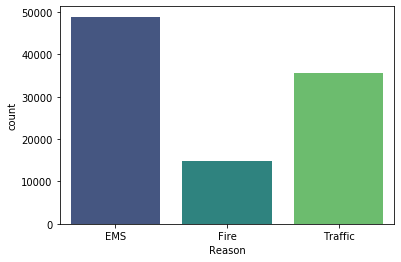

In [18]:
sns.countplot(data=df, x='Reason', palette='viridis')

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [19]:
type(df['timeStamp'].iloc[0])

str

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [20]:
df['timeStampRev'] = pd.to_datetime(df['timeStamp'])
type(df['timeStampRev'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [21]:
df['Hour']=df['timeStampRev'].apply(lambda x: x.hour)
df['Month']=df['timeStampRev'].apply(lambda x: x.month)
df['Day of Week']=df['timeStampRev'].apply(lambda x: x.weekday())

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStampRev,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
  

In [23]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

In [24]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

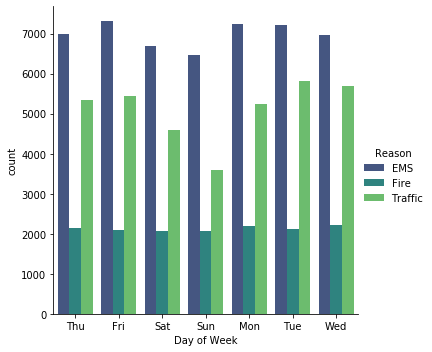

In [25]:
sns.catplot(x="Day of Week", hue="Reason", data=df, kind="count", palette='viridis')

**Now do the same for Month:**

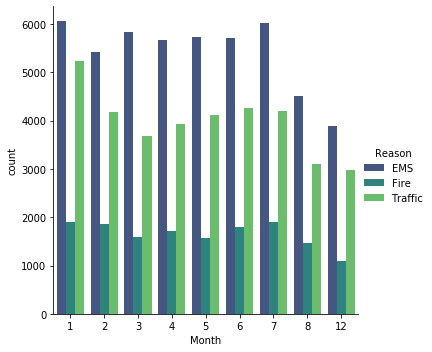

In [26]:
sns.catplot(x="Month", hue="Reason", data=df, kind="count", palette='viridis')

**Did you notice something strange about the Plot?**

_____

*You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...*

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [27]:
byMonth=df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStampRev,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

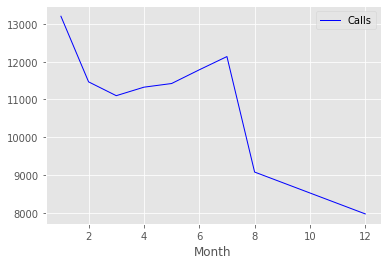

In [28]:
plt.style.use('ggplot')
byMonth['Month'] = byMonth.index
byMonth['Calls'] = byMonth.e
byMonth.plot.line(x='Month', y='Calls', figsize=(6,4), lw=1, color='b')


**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

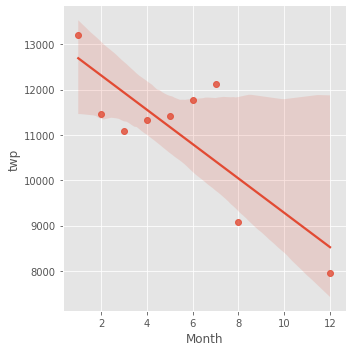

In [29]:
sns.lmplot(data=byMonth,x='Month',y='twp')

This Lmplot is not that good in showcasing any particular trend or model for calls by month. Data is skewing too much on the data in July and it seems September, October & November are missing from the dataframe.

*Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.*

In [30]:
df['Date']=df['timeStampRev'].apply(lambda x: x.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [31]:
byDate=df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStampRev,Hour,Month,Day of Week
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


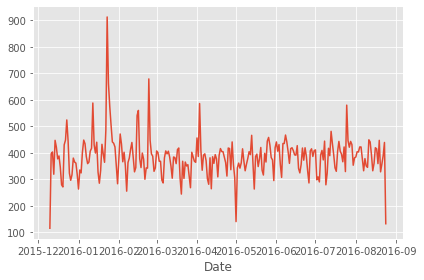

In [32]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

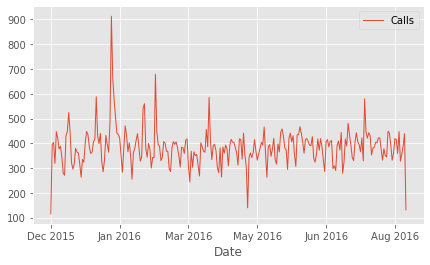

In [33]:
byDate['Date'] = byDate.index
byDate['Date']=byDate['Date'].apply(lambda x: x.strftime('%b %Y'))
byDate['Calls'] = byDate.e
byDate.plot.line(x='Date', y='Calls', figsize=(7,4), lw=1)

**The exercise asked to recreate the plot dividing the calls by each Reason, this by creating 3 differnt plots, I included a third plot showing all calls in a single plot with reasons divided by color assigned to the line plot**

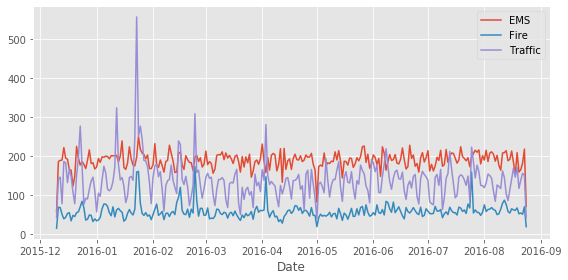

In [34]:
reasonlist=list(df['Reason'].unique()) #define the list of reasons in the data
for i in reasonlist: #plot for each reason a line with a differnt associated color
    df[df['Reason']==i].groupby('Date').count()['lat'].plot(figsize=(8,4), label=i) #filter dataset for each reason before plotting with pandas build-in plotting and assign label to each reason
    plt.legend() #plot legend
    plt.tight_layout(); #better layout

### Interpretation:
*While showing the same cumulative difference we saw in the histogram earlier on, with EMS being the most reason people call 911 for. We can find few peaks where other reasons were predominant and may be deriving from a similar issue around a brief interval of time, but generally it is showing the same average amount of calls for each Reason.
Must point out calls for Traffic seems to variate across the time period more often than the rest with few really high peaks, most likely connected to the same event.
Here we can understand why Oct. and Nov are missing, the data is continuous from Dec 2015 to August 2016, so the lmplot over the monthly calls was not usable.*


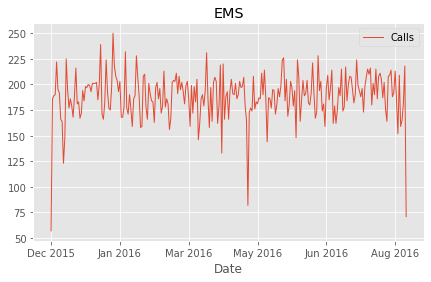

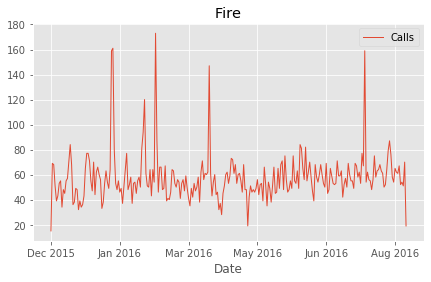

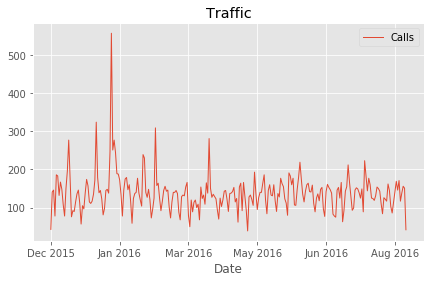

In [35]:
reasonlist=list(df['Reason'].unique())
for i in reasonlist:
    dftemp = df[df['Reason'] == i]
    byDatetp = dftemp.groupby('Date').count()
    byDatetp['Date'] = byDatetp.index
    byDatetp['Date'] = byDatetp['Date'].apply(lambda x: x.strftime('%b %Y'))
    byDatetp['Calls'] = byDatetp.e
    byDatetp.plot.line(x='Date', y='Calls', figsize=(7,4), lw=1)
    plt.title(i);

### Checking calls quantity across time intervals and finding periods with more activity

*Grouped data by day of the week and hours counting the entries for each group creating a multiindex dataframe with counts as values, unstack the 'hours' level to create a pivot table showing data by day of the week vs hour.*

In [36]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['e'].unstack() #groupby Day & Hours and counting on any column (choosen 'e'), ustack on default level
dayHour.head() #check the new df top rows

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


### HeatMap - Day vs Hour

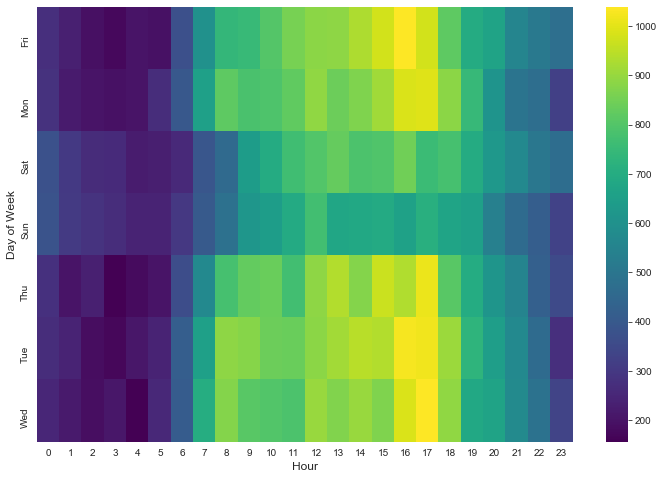

In [37]:
sns.set_style("white") #set style to what I like
plt.figure(figsize=(12,8)) #set figure size for better readability 
sns.heatmap(dayHour, cmap='viridis') #plot heatmap with selected coloring set

### Interpretation:
*An higher amount of calls is seens during the day with peaks around 3 to 5pm, especially during the weekdays.
Let's check a clustermap to see if interpretation is correct and visualize it better*

### Clustermap - Day vs Hour

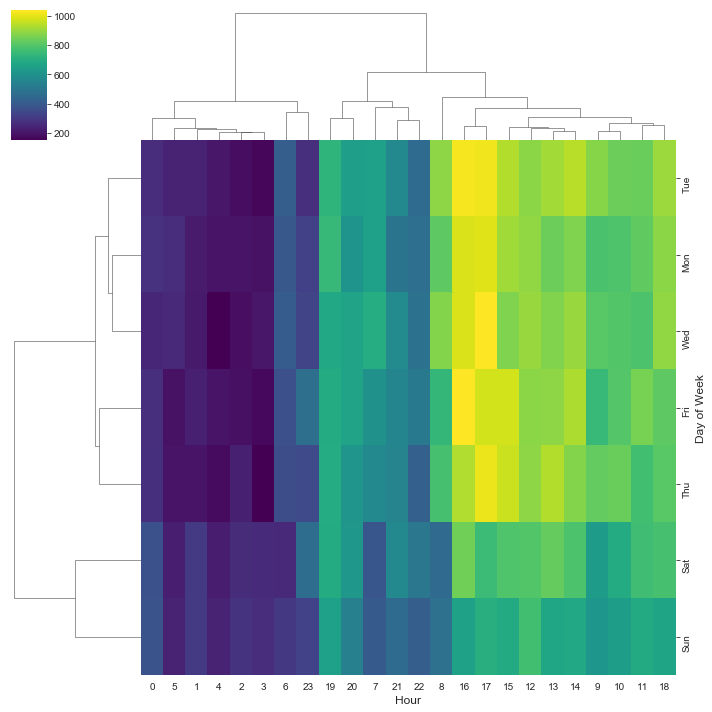

In [42]:
sns.clustermap(dayHour, cmap='viridis') #simply run new dataframe into a clustermap function form seaborn

### Interpretation:
*As unorderly seen on the heatmap the clustermap confirms the interpretation. with low amoutn of calls in the weekends and over late night/early morning times, while high amount of activity concentrated in the weekdays and around 4/5pm.
It is nice to see that upon averaging out thru the full week the hours with highest average is 6pm for the entire week.*

### Heatmap - Day vs Month
*Same operations we did on the day vs Hours, but this time going above in timescale and checking day vs month. To check calls over the yearly period.
Almost same code and workflow, just changing columns on which iterate on.*

In [39]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['e'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


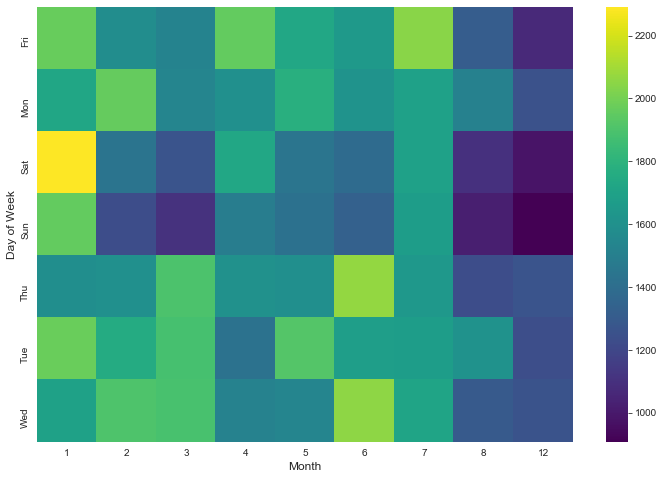

In [45]:
plt.figure(figsize=(12,8)) #nice big figure
sns.heatmap(dayMonth, cmap='viridis') #simply running new df in the seaborn function

### Interpretation:
*Looking at the entire year calls count a little difernt scenario comes up form the heatmap.
the highest amount of calls overall is in January and on saturdays instead of the workdays as seen in the weekly check by hours. To highlight though is that the scale between lower and higher bounds over the year division is differnt from the by hour division. They are roughly double the amount from each other (2000/1000, \~100% variance), while the hourly stacking showed higher rates of variance from 1000 to 200 units (\~500% variance).
anything else is a little more difficult to interpret, so let's see if the clustermap will help.
I changed coloring on the next plot due to the variance being smaller and wanting to highlight more the division between amount of calls thru the week.*

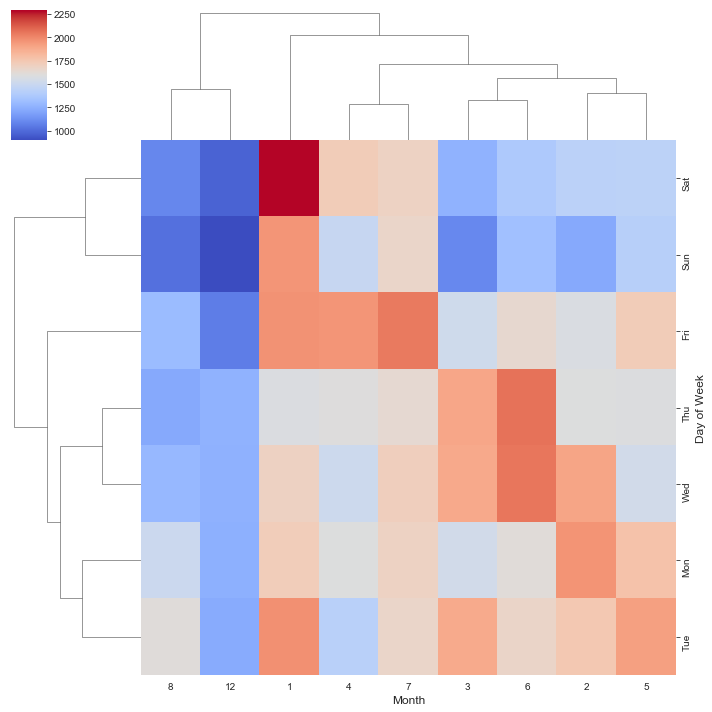

In [47]:
sns.clustermap(dayMonth, cmap='coolwarm') #simply running new df in the seaborn function, changed camp to highlight more variance.

### Interpretation:
*Saturday and Sunday now are at the top of the plot... inverse trend from the check performed by the hours.
The change in coloring helps identifying more trends due to the smaller variance of the dataset grouped in this particular way.
The lowest amount of calls on average were in August and December, followed by January, April and July with somehow higher amounts of calls on Sat/Sun/Fry contrary to the dayvsHours plot, and months with highest average across the entire week for the rest of the year, but those respecting the previous trend we saw with weekends generally having less calls.
Something must be said though, the data span for a single year so cannot be used to make any observation on particular yearly trends.*